To take the data of each sensor with CW and CCW different and save to an excel sheet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
os. chdir('Data/')
file_TDK = ["0h_F_125C_Stressteile_TDK.xlsm", "0h_F_150C_Stressteile_TDK.xlsm", "500h_G_125C_Stressteile_TDK_0Kalibriert.xlsm","500h_G_150C_Stressteile_TDK_0Kalibriert.xlsm", "1000h_125C_Stressteile_TDK_0Kalibriert.xlsm","1000h_150C_Stressteile_TDK_0Kalibriert.xlsm","1500h_125C_Stressteile_TDK_0Kalibriert.xlsm","1500h_150C_Stressteile_TDK_0Kalibriert.xlsm","2000h_125C_Stressteile_TDK_0Kalibriert.xlsm","2000h_150C_Stressteile_TDK_0Kalibriert.xlsm"]
file = ["0h_F_125C_Stressteile_INF.xlsm", "0h_F_150C_Stressteile_INF.xlsm", "500h_G_125C_Stressteile_INF_0Kalibriert.xlsm","500h_G_150C_Stressteile_INF_0Kalibriert.xlsm", "1000h_125C_Stressteile_INF_0Kalibriert.xlsm","1000h_150C_Stressteile_INF_0Kalibriert.xlsm","1500h_125C_Stressteile_INF_0Kalibriert.xlsm","1500h_150C_Stressteile_INF_0Kalibriert.xlsm","2000h_125C_Stressteile_INF_0Kalibriert.xlsm","2000h_150C_Stressteile_INF_0Kalibriert.xlsm"]

In [3]:
mylist1 = ['oU', 'mU']
rotation = ['CW', 'CCW']
temp_list = []
type_list = []
hour_list = []
temp_list_TDK = []
type_list_TDK = []
hour_list_TDK = []
mylist_INF = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
mylist_TDK = ['01', '02', '03', '04', '05', '06', '07', '08', '09']
count = 0
fdata_INF = pd.DataFrame(columns = ['ID', 'Angle_Error', 'rotation', 'umbau', 'type', 'temp', 'hour'])
fdata_TDK = pd.DataFrame(columns = ['ID', 'Angle_Error', 'rotation', 'umbau', 'type', 'temp', 'hour'])

In [4]:
for a in file:
    if "INF" in a:
        type_list.append('INF')
    if "0h_F_" in a:
        hour_list.append('0')
    elif "500h_G_" in a:
        hour_list.append('500')
    elif "1000h" in a:
        hour_list.append('1000')
    elif "1500h" in a:
        hour_list.append('1500')
    elif "2000h" in a:
        hour_list.append('2000')
    if "125C" in a:
        temp_list.append('125')
    if "150C" in a:
        temp_list.append('150')

for a in file_TDK:
    if "TDK" in a:
        type_list_TDK.append('TDK')
    if "0h_F_" in a:
        hour_list_TDK.append('0')
    elif "500h_G_" in a:
        hour_list_TDK.append('500')
    elif "1000h" in a:
        hour_list_TDK.append('1000')
    elif "1500h" in a:
        hour_list_TDK.append('1500')
    elif "2000h" in a:
        hour_list_TDK.append('2000')
    if "125C" in a:
        temp_list_TDK.append('125')
    if "150C" in a:
        temp_list_TDK.append('150')

print(temp_list)
print(hour_list)
print(type_list)

print(temp_list_TDK)
print(hour_list_TDK)
print(type_list_TDK)

['125', '150', '125', '150', '125', '150', '125', '150', '125', '150']
['0', '0', '500', '500', '1000', '1000', '1500', '1500', '2000', '2000']
['INF', 'INF', 'INF', 'INF', 'INF', 'INF', 'INF', 'INF', 'INF', 'INF']
['125', '150', '125', '150', '125', '150', '125', '150', '125', '150']
['0', '0', '500', '500', '1000', '1000', '1500', '1500', '2000', '2000']
['TDK', 'TDK', 'TDK', 'TDK', 'TDK', 'TDK', 'TDK', 'TDK', 'TDK', 'TDK']


In [5]:
for a in file:
    for z in rotation:
        if "0h_F_" in a:
            col_name = 'w'
            if z == 'CW':
                Skip_Rows = 15
                N_Rows = 65
            elif z == 'CCW':
                Skip_Rows = 80
                No_Rows = 65
        else:
            col_name='ac'
            if z == 'CW':
                Skip_Rows = 19
                N_Rows = 65
            elif z == 'CCW':
                Skip_Rows = 84
                No_Rows = 65
        for y in mylist1:
            for x in mylist_INF:
                data1 = pd.read_excel(a, sheet_name = "{}_FF_ST_{}_{}".format(type_list[count],y,x), skiprows=Skip_Rows, nrows=N_Rows, usecols=col_name, header=None, dtype=np.float64)
                data1 = abs(data1.values)
                data1 = pd.DataFrame(data1, columns=["Angle_Error"], index = None)
                fdata_INF = pd.concat([fdata_INF,data1], ignore_index=True, sort = False)
    umbau = pd.DataFrame(columns = ['umbau'], index = None)
    iD = pd.DataFrame(columns = ['ID'], index = None)
    rot = pd.DataFrame(columns = ['rotation'], index = None)
    Typ = pd.DataFrame(columns = ['type'], index = None)
    Temp = pd.DataFrame(columns = ['temp'], index = None)
    Hr = pd.DataFrame(columns = ['hour'], index = None)
    for y in list(reversed(mylist1)):
        umbau1 = pd.DataFrame(['{}'.format(y)]*975, columns = ['umbau'], index = None)
        umbau = pd.concat([umbau1, umbau], ignore_index=True, sort = False)
    umbau = pd.concat([umbau]*2*len(file),ignore_index=True)
    for z in list(reversed(rotation)):
        rotation1 = pd.DataFrame(['{}'.format(z)]*1950, columns = ['rotation'], index = None)
        rot = pd.concat([rotation1, rot], ignore_index=True, sort = False)
    rot = pd.concat([rot]*len(file), ignore_index=True)
    for tmp in list(reversed(temp_list)):
        Temp1 = pd.DataFrame(['{}'.format(tmp)]*3900, columns = ['temp'], index = None)
        Temp = pd.concat([Temp1, Temp], ignore_index=True, sort = False)
    for hr in list(reversed(hour_list)):
        Hr1 = pd.DataFrame(['{}'.format(hr)]*3900, columns = ['hour'], index = None)
        Hr = pd.concat([Hr1, Hr], ignore_index=True, sort = False)
    for typ in list(reversed(type_list)):
        Typ1 = pd.DataFrame(['{}'.format(typ)]*3900, columns = ['type'], index = None)
        Typ = pd.concat([Typ1, Typ], ignore_index=True, sort = False)
    for x in list(reversed(mylist_INF)):
        iD0 = pd.DataFrame(['{}'.format(x)]*65, columns = ['ID'], index = None)
        iD = pd.concat([iD0, iD], ignore_index=True, sort = False)
    iD = pd.concat([iD]*4*len(file),ignore_index=True)
    count = count+1
    
count = 0
fdata_INF.update(iD)
fdata_INF.update(rot)
fdata_INF.update(Temp)
fdata_INF.update(umbau)
fdata_INF.update(Typ)
fdata_INF.update(Hr)

In [6]:
print(fdata_INF)

       ID  Angle_Error rotation umbau type temp  hour
0      01     0.102587       CW    oU  INF  125     0
1      01     0.253484       CW    oU  INF  125     0
2      01     0.265910       CW    oU  INF  125     0
3      01     0.241020       CW    oU  INF  125     0
4      01     0.214987       CW    oU  INF  125     0
...    ..          ...      ...   ...  ...  ...   ...
38995  15     0.016036      CCW    mU  INF  150  2000
38996  15     0.028285      CCW    mU  INF  150  2000
38997  15     0.095934      CCW    mU  INF  150  2000
38998  15     0.084542      CCW    mU  INF  150  2000
38999  15     0.026696      CCW    mU  INF  150  2000

[39000 rows x 7 columns]


In [7]:
#Replacing First readings with second for INF
for i in range(600):
    fdata_INF.drop([i*65], axis=0, inplace=True)
print(fdata_INF)

       ID  Angle_Error rotation umbau type temp  hour
1      01     0.253484       CW    oU  INF  125     0
2      01     0.265910       CW    oU  INF  125     0
3      01     0.241020       CW    oU  INF  125     0
4      01     0.214987       CW    oU  INF  125     0
5      01     0.132727       CW    oU  INF  125     0
...    ..          ...      ...   ...  ...  ...   ...
38995  15     0.016036      CCW    mU  INF  150  2000
38996  15     0.028285      CCW    mU  INF  150  2000
38997  15     0.095934      CCW    mU  INF  150  2000
38998  15     0.084542      CCW    mU  INF  150  2000
38999  15     0.026696      CCW    mU  INF  150  2000

[38400 rows x 7 columns]


In [8]:
for a in file_TDK:
    for z in rotation:
        if "0h_F_" in a:
            col_name = 'w'
            if z == 'CW':
                Skip_Rows = 15
                N_Rows = 65
            elif z == 'CCW':
                Skip_Rows = 80
                No_Rows = 65
        else:
            col_name='ac'
            if z == 'CW':
                Skip_Rows = 19
                N_Rows = 65
            elif z == 'CCW':
                Skip_Rows = 84
                No_Rows = 65
        for y in mylist1:
            for x in mylist_TDK:
                data1 = pd.read_excel(a, sheet_name = "{}_FF_ST_{}_{}".format(type_list_TDK[count],y,x), skiprows=Skip_Rows, nrows=N_Rows, usecols=col_name, header=None, dtype=np.float64)
                data1 = abs(data1.values)
                data1 = pd.DataFrame(data1, columns=["Angle_Error"], index = None)
                fdata_TDK = pd.concat([fdata_TDK,data1], ignore_index=True, sort = False)
    umbau.drop(umbau.index, inplace=True)
    iD.drop(iD.index, inplace=True)
    rot.drop(rot.index, inplace=True)
    Typ.drop(Typ.index, inplace=True)
    Temp.drop(Temp.index, inplace=True)
    Hr.drop(Hr.index, inplace=True)
    for y in list(reversed(mylist1)):
        umbau1 = pd.DataFrame(['{}'.format(y)]*585, columns = ['umbau'], index = None)
        umbau = pd.concat([umbau1, umbau], ignore_index=True, sort = False)
    umbau = pd.concat([umbau]*2*len(file_TDK),ignore_index=True)
    for z in list(reversed(rotation)):
        rotation1 = pd.DataFrame(['{}'.format(z)]*1170, columns = ['rotation'], index = None)
        rot = pd.concat([rotation1, rot], ignore_index=True, sort = False)
    rot = pd.concat([rot]*len(file_TDK), ignore_index=True)
    for tmp in list(reversed(temp_list_TDK)):
        Temp1 = pd.DataFrame(['{}'.format(tmp)]*2340, columns = ['temp'], index = None)
        Temp = pd.concat([Temp1, Temp], ignore_index=True, sort = False)
    for hr in list(reversed(hour_list_TDK)):
        Hr1 = pd.DataFrame(['{}'.format(hr)]*2340, columns = ['hour'], index = None)
        Hr = pd.concat([Hr1, Hr], ignore_index=True, sort = False)
    for typ in list(reversed(type_list_TDK)):
        Typ1 = pd.DataFrame(['{}'.format(typ)]*2340, columns = ['type'], index = None)
        Typ = pd.concat([Typ1, Typ], ignore_index=True, sort = False)
    for x in list(reversed(mylist_TDK)):
        iD0 = pd.DataFrame(['{}'.format(x)]*65, columns = ['ID'], index = None)
        iD = pd.concat([iD0, iD], ignore_index=True, sort = False)
    iD = pd.concat([iD]*4*len(file_TDK),ignore_index=True)
    count = count+1

fdata_TDK.update(iD)
fdata_TDK.update(rot)
fdata_TDK.update(Temp)
fdata_TDK.update(umbau)
fdata_TDK.update(Typ)
fdata_TDK.update(Hr)

In [9]:
print(fdata_TDK)

       ID  Angle_Error rotation umbau type temp  hour
0      01     0.246198       CW    oU  TDK  125     0
1      01     0.057051       CW    oU  TDK  125     0
2      01     0.105972       CW    oU  TDK  125     0
3      01     0.101425       CW    oU  TDK  125     0
4      01     0.053125       CW    oU  TDK  125     0
...    ..          ...      ...   ...  ...  ...   ...
23395  09     0.243152      CCW    mU  TDK  150  2000
23396  09     0.274816      CCW    mU  TDK  150  2000
23397  09     0.291352      CCW    mU  TDK  150  2000
23398  09     0.217006      CCW    mU  TDK  150  2000
23399  09     0.191529      CCW    mU  TDK  150  2000

[23400 rows x 7 columns]


In [10]:
#Replacing First readings with second for TDK
for i in range(360):
    fdata_TDK.drop([i*65], axis=0, inplace=True)
print(fdata_TDK)

       ID  Angle_Error rotation umbau type temp  hour
1      01     0.057051       CW    oU  TDK  125     0
2      01     0.105972       CW    oU  TDK  125     0
3      01     0.101425       CW    oU  TDK  125     0
4      01     0.053125       CW    oU  TDK  125     0
5      01     0.058061       CW    oU  TDK  125     0
...    ..          ...      ...   ...  ...  ...   ...
23395  09     0.243152      CCW    mU  TDK  150  2000
23396  09     0.274816      CCW    mU  TDK  150  2000
23397  09     0.291352      CCW    mU  TDK  150  2000
23398  09     0.217006      CCW    mU  TDK  150  2000
23399  09     0.191529      CCW    mU  TDK  150  2000

[23040 rows x 7 columns]


In [11]:
DATA = pd.concat([fdata_INF,fdata_TDK], ignore_index=True, sort = False)
print(DATA)

       ID  Angle_Error rotation umbau type temp  hour
0      01     0.253484       CW    oU  INF  125     0
1      01     0.265910       CW    oU  INF  125     0
2      01     0.241020       CW    oU  INF  125     0
3      01     0.214987       CW    oU  INF  125     0
4      01     0.132727       CW    oU  INF  125     0
...    ..          ...      ...   ...  ...  ...   ...
61435  09     0.243152      CCW    mU  TDK  150  2000
61436  09     0.274816      CCW    mU  TDK  150  2000
61437  09     0.291352      CCW    mU  TDK  150  2000
61438  09     0.217006      CCW    mU  TDK  150  2000
61439  09     0.191529      CCW    mU  TDK  150  2000

[61440 rows x 7 columns]


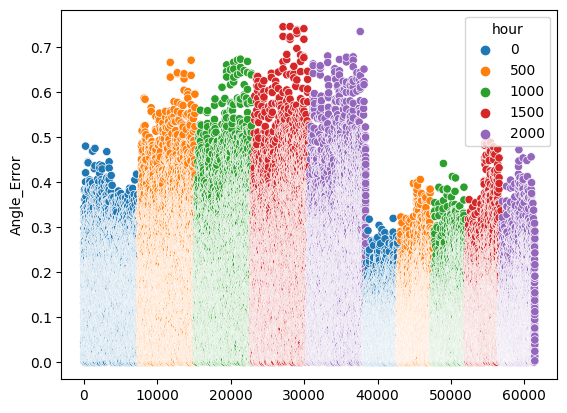

In [12]:
g =sns.scatterplot(x=DATA.index, y="Angle_Error",hue="hour",
              data=DATA)

In [13]:
os.chdir('..')
print(os.getcwd())

c:\Users\kirta\OneDrive\Desktop\DIT\SEM 2\CS_IS\anglesensor\AS


In [14]:
DATA.to_excel("angle_error_clean.xlsx")